In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
f = "../data/001_raw/DatosClimaIkiam.csv"
ikiam = pd.read_csv(f,sep=";",skiprows=1,encoding='iso-8859-1')
ikiam.columns = [
    "time",
    "To_2m",
    "hr_2m",
    "Ig_2m",
    "ws_2m",
    "wd_2m",
    "To_10m",
    "hr_10m",
    "Ig_10m",
    "Id_10m",
    "ws_10m",
    "wd_10m",
    "Tg_0cm",
    "Tg_5cm",
    "Tg_10cm",
    "Tg_30cm",
    "Tg_50cm",
    "Tg60cm",
    "Tg80cm"
]
ikiam.time = pd.to_datetime(ikiam.time,format="%d/%m/%Y %H:%M",errors="coerce")
ikiam.set_index("time",inplace=True)
ikiam = ikiam.sort_index()

ikiam

,To_2m,hr_2m,Ig_2m,ws_2m,wd_2m,To_10m,hr_10m,Ig_10m,Id_10m,ws_10m,wd_10m,Tg_0cm,Tg_5cm,Tg_10cm,Tg_30cm,Tg_50cm,Tg60cm,Tg80cm
time,,,,,,,,,,,,,,,,,,
2024-05-11 00:01:00,22.2,NaN,0.0,0.0,73,22.34,100.24,0.0,0.0,0.34,29.0,22.61,23.23,24.56,25.00,24.70,24.27,24.62
2024-05-11 00:02:00,22.1,NaN,0.0,0.0,73,22.33,100.24,0.0,0.0,0.22,19.0,22.61,23.23,24.55,25.00,24.70,24.27,24.62
2024-05-11 00:03:00,22.1,NaN,0.0,0.0,73,22.32,100.24,0.0,0.0,0.16,1.0,22.60,23.23,24.55,24.99,24.70,24.27,24.62
2024-05-11 00:04:00,22.1,NaN,0.0,0.0,73,22.32,100.23,0.0,0.0,0.11,28.0,22.59,23.22,24.54,24.99,24.70,24.27,24.62
2024-05-11 00:05:00,22.1,NaN,0.0,0.0,73,22.30,100.23,0.0,0.0,0.21,39.0,22.58,23.21,24.54,24.99,24.70,24.27,24.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,22.2,NaN,0.0,0.0,26,22.75,94.39,0.0,0.0,0.11,35.0,23.23,23.84,25.60,26.21,25.81,25.19,25.22
NaT,20.9,NaN,0.0,0.0,83,21.24,98.80,0.0,0.0,0.24,328.0,21.70,22.24,23.71,24.37,24.95,25.25,25.21
NaT,20.7,NaN,0.0,0.0,53,21.25,95.60,0.0,0.0,0.32,74.0,21.48,22.14,23.91,24.60,24.92,25.21,25.21


In [3]:
ikiam.index.min()

Timestamp('2024-05-11 00:01:00')

In [4]:
ikiam.index.max()

Timestamp('2024-12-30 23:59:00')

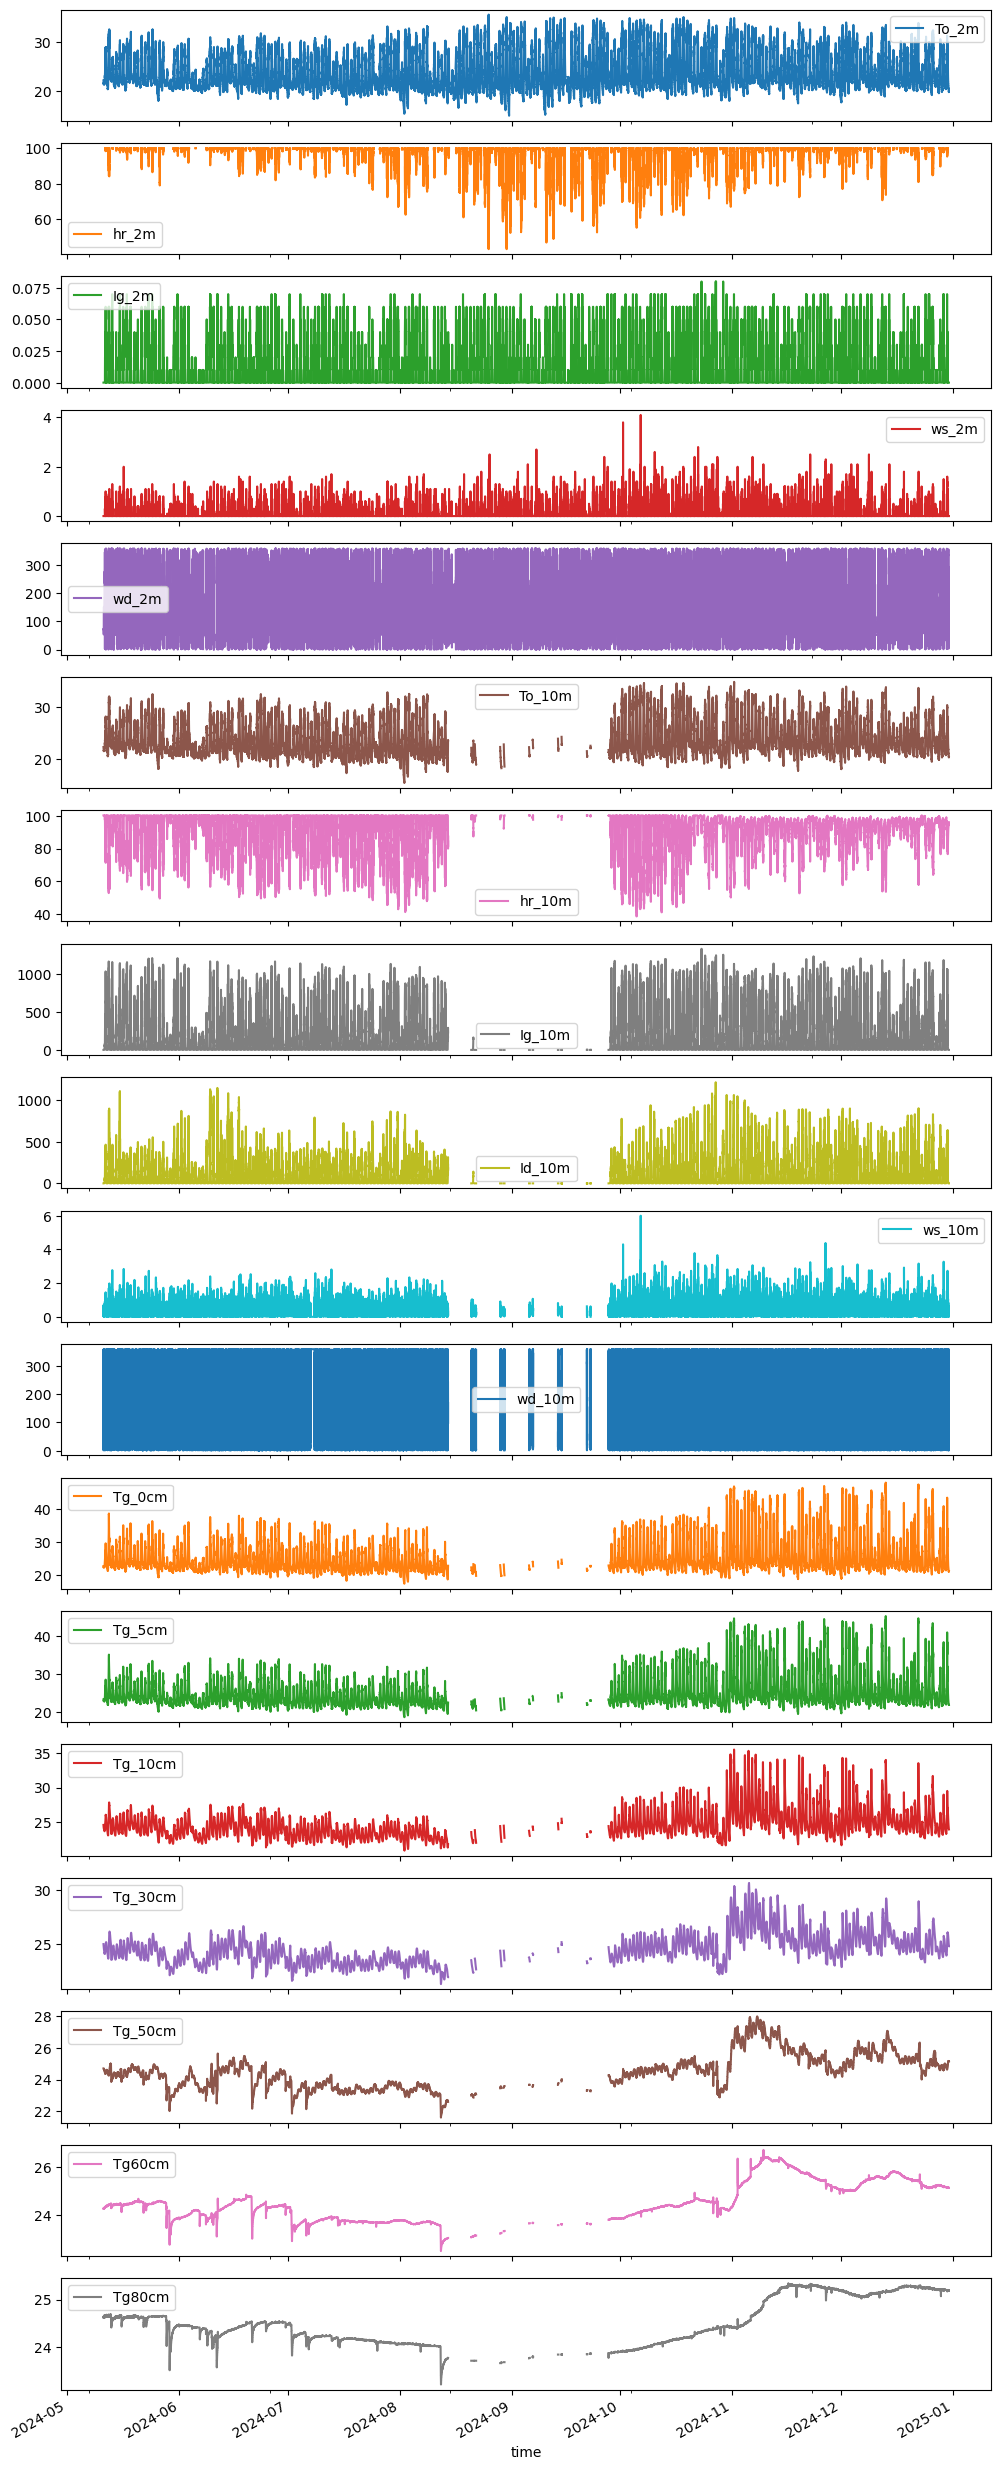

In [5]:
ikiam.plot(subplots=True,figsize=(12,35));

In [6]:
ikiam.columns

Index(['To_2m', 'hr_2m', 'Ig_2m', 'ws_2m', 'wd_2m', 'To_10m', 'hr_10m',
       'Ig_10m', 'Id_10m', 'ws_10m', 'wd_10m', 'Tg_0cm', 'Tg_5cm', 'Tg_10cm',
       'Tg_30cm', 'Tg_50cm', 'Tg60cm', 'Tg80cm'],
      dtype='object')

In [7]:
columnas_epw = ['To_10m', 'hr_10m','Ig_10m', 'Id_10m', 'ws_10m', 'wd_10m']
mask = (ikiam.index >= '2024-11-01') & (ikiam.index <= '2024-12-31')
ikiam_filtrado = ikiam[columnas_epw].loc[mask]
ikiam_filtrado = ikiam_filtrado.resample('1Min').mean()

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

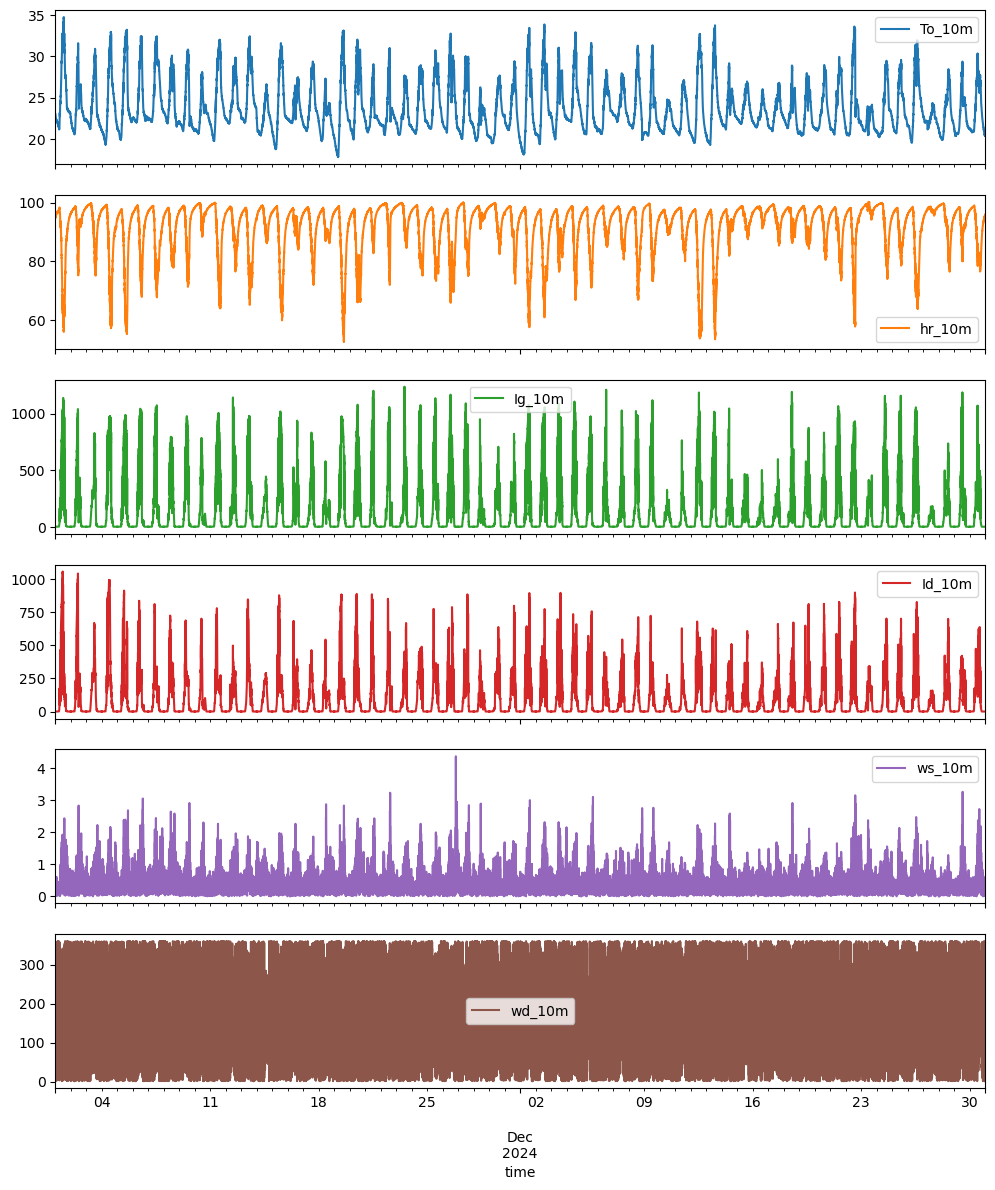

In [8]:
ikiam_filtrado.plot(subplots=True,figsize=(12,14))

In [9]:
def df2epw(df):
    df['anio']    = df.index.year
    df['mes']     = df.index.month
    df['dia']     = df.index.day
    df['hora']    = df.index.hour  
    df['minutos'] = df.index.minute
    return df[:]


In [10]:
def df2epw(df):
    # Hacemos una copia para evitar modificar el original
    df = df.copy()
    
    
    # Extraemos las componentes de fecha
    df['anio'] = df.index.year
    df['mes'] = df.index.month
    df['dia'] = df.index.day
    
    # La hora: si al sumar 1 hora la hora resulta 0, se debe cambiar a 24
    df['hora'] = df.index.hour + 1
    # df.loc[df['hora'] == 0, 'hora'] = 24
    
    # El campo de minutos en EPW es siempre 60 (fin del período)
    df['minutos'] = df.index.minute
    
    return df.iloc[:]


In [11]:
tmp = df2epw(ikiam_filtrado)
columnas_epw = ['anio','mes','dia','hora','minutos','To_10m', 'hr_10m','Ig_10m', 'Id_10m', 'ws_10m', 'wd_10m']

tmp.to_csv( "../data/002_intermediate/ikiam.csv",
           columns=columnas_epw,header=False,index=False)
tmp.to_csv( "../epw/Ikiam_Nov_Dic_2024.csv",
           columns=columnas_epw,header=False,index=False)


In [12]:
tmp

,To_10m,hr_10m,Ig_10m,Id_10m,ws_10m,wd_10m,anio,mes,dia,hora,minutos
time,,,,,,,,,,,
2024-11-01 00:01:00,23.11,94.65,0.0,0.0,0.48,91.0,2024,11,1,1,1
2024-11-01 00:02:00,23.11,94.67,0.0,0.0,0.61,98.0,2024,11,1,1,2
2024-11-01 00:03:00,23.09,94.69,0.0,0.0,0.63,105.0,2024,11,1,1,3
2024-11-01 00:04:00,23.08,94.68,0.0,0.0,0.56,103.0,2024,11,1,1,4
2024-11-01 00:05:00,23.06,94.68,0.0,0.0,0.47,94.0,2024,11,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:55:00,20.42,95.80,0.0,0.0,0.12,128.0,2024,12,30,24,55
2024-12-30 23:56:00,20.42,95.81,0.0,0.0,0.31,100.0,2024,12,30,24,56
2024-12-30 23:57:00,20.43,95.86,0.0,0.0,0.38,88.0,2024,12,30,24,57
